statistical inference.

Amit Malka

Part A:data preparation.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import ttest_ind


df = pd.read_csv("lewis.csv")
#childrens that use antibiotics ot steroids once or more 
children = set(df.loc[(df["Antibiotics"] == "Use") | (df["Steroids"] == "Use"),"Subject"].values)
#drop all childerns that use antibiotics ot steroids once or more.
df = df.drop(df[df["Subject"].isin(children)].index)
# Print the number of samples remaining for each combination of time + treatment
groups = df.groupby(["Time", "Treatment"])
print(groups.size())

Time     Treatment
1        EEN          15
         PEN           6
         antiTNF      16
2        EEN          11
         PEN           6
         antiTNF      15
3        EEN          11
         PEN           6
         antiTNF      16
4        EEN          11
         PEN           6
         antiTNF      16
Healthy  Healthy      26
dtype: int64


Part B: Testing the effect of the treatments on the condition of the disease.

<AxesSubplot: xlabel='Time', ylabel='FCP'>

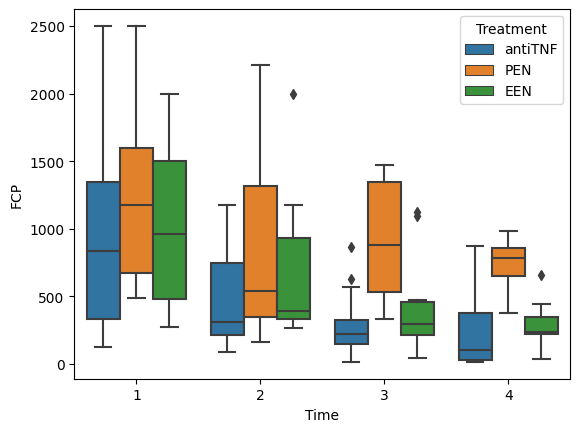

In [19]:
# keep rows for children with Crohn's disease
df_jc = df[df["Time"] != "Healthy"]

# boxplots for each time point
sns.boxplot(x='Time', y='FCP', hue='Treatment', data=df_jc)


In [20]:
#P value of the Kruskal-Wallis test that compares each of the treatments at each time point.
week1_EEN = df_jc[(df_jc["Time"] == "1") & (df_jc["Treatment"] == "EEN")]["FCP"].values
week1_PEN = df_jc[(df_jc["Time"] == "1") & (df_jc["Treatment"] == "PEN")]["FCP"].values
week1_antiTNF = df_jc[(df_jc["Time"] == "1") & (df_jc["Treatment"] == "antiTNF")]["FCP"].values
result1 = stats.kruskal(week1_antiTNF,week1_EEN,week1_PEN,nan_policy='omit')
fdr1 = fdrcorrection(result1)
fdrp_value1 = (fdr1[1])[1]
week2_EEN = df_jc[(df_jc["Time"] == "2") & (df_jc["Treatment"] == "EEN")]["FCP"].values
week2_PEN = df_jc[(df_jc["Time"] == "2") & (df_jc["Treatment"] == "PEN")]["FCP"].values
week2_antiTNF = df_jc[(df_jc["Time"] == "2") & (df_jc["Treatment"] == "antiTNF")]["FCP"].values
result2 = stats.kruskal(week2_antiTNF,week2_EEN,week2_PEN,nan_policy='omit')
fdr2 = fdrcorrection(result2)
fdrp_value2 = (fdr2[1])[1]
week3_EEN = df_jc[(df_jc["Time"] == "3") & (df_jc["Treatment"] == "EEN")]["FCP"].values
week3_PEN = df_jc[(df_jc["Time"] == "3") & (df_jc["Treatment"] == "PEN")]["FCP"].values
week3_antiTNF = df_jc[(df_jc["Time"] == "3") & (df_jc["Treatment"] == "antiTNF")]["FCP"].values
result3 = stats.kruskal(week3_antiTNF,week3_EEN,week3_PEN,nan_policy='omit')
fdr3 = fdrcorrection(result3)
fdrp_value3 = (fdr3[1])[1]
week4_EEN = df_jc[(df_jc["Time"] == "4") & (df_jc["Treatment"] == "EEN")]["FCP"].values
week4_PEN = df_jc[(df_jc["Time"] == "4") & (df_jc["Treatment"] == "PEN")]["FCP"].values
week4_antiTNF = df_jc[(df_jc["Time"] == "4") & (df_jc["Treatment"] == "antiTNF")]["FCP"].values
result4 = stats.kruskal(week4_antiTNF,week4_EEN,week4_PEN,nan_policy='omit')
fdr4 = fdrcorrection(result4)
fdrp_value4 = (fdr1[1])[1]
print(f'Week 1 P-value:{fdrp_value1}\nWeek 2 P-value:{fdrp_value2}\nWeek 3 P-value:{fdrp_value3}\nWeek 4 P-value:{fdrp_value4}')

Week 1 P-value:0.9794284910890498
Week 2 P-value:0.8479637976355192
Week 3 P-value:0.015397449184710425
Week 4 P-value:0.9794284910890498


It can be seen from the P-value, that in the third week there is a big difference in significance.

Part C: Testing the effect of treatments on the microbiome.

<AxesSubplot: xlabel='Time', ylabel='Shannon'>

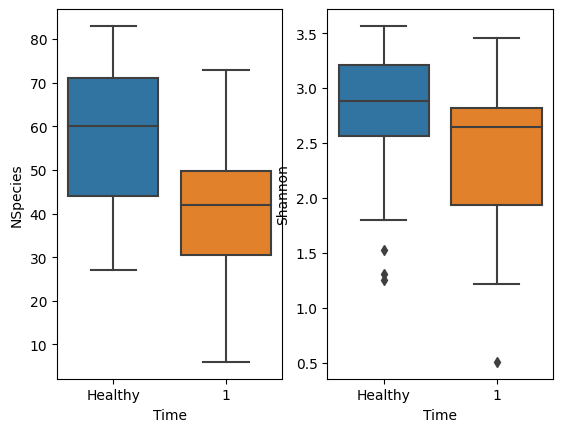

In [21]:
#Sort by read length of 5 million minimum.
#Below this length of readings the resolution of microbiome
#characterization may not be sensitive enough.
df = df[df["NReads"] >= 5]
df_time1 = df[(df['Time'] == '1') | (df['Time'] == 'Healthy')]
fig, axs = plt.subplots(1, 2)
sns.boxplot(x='Time', y='NSpecies', data=df_time1, ax=axs[0])
sns.boxplot(x='Time', y='Shannon', data=df_time1, ax=axs[1])


In [23]:
# Extract data for sick children and healthy children at time 1
NS_sick_children_t1 = df[(df["Time"] == "1") & (df["Treatment"] != "Healthy")]["NSpecies"].values
NS_healthy_children_t1 = df[(df["Time"] == "1") | (df["Treatment"] == "Healthy")]["NSpecies"].values
Sh_sick_children_t1 = df[(df["Time"] == "1") & (df["Treatment"] != "Healthy")]["Shannon"].values
Sh_healthy_children_t1 = df[(df["Time"] == "1") | (df["Treatment"] == "Healthy")]["Shannon"].values

# Perform t-test
t_value, NS_Tp_value = ttest_ind(NS_sick_children_t1, NS_healthy_children_t1, nan_policy='omit')
print(f'NSpecies T test P-value:{NS_Tp_value}')
# Perform t-test
t_value, Sh_Tp_value = ttest_ind(Sh_sick_children_t1, Sh_healthy_children_t1, nan_policy='omit')
print(f'Shannon T test P-value:{Sh_Tp_value}')

NSpecies T test P-value:0.04669265272617157
Shannon T test P-value:0.38421403043471913


There is a significant difference in the number of species between sick and healthy children at time 1.
There is no significant difference in the Shanon Index between sick and healthy children at time 1.

<AxesSubplot: xlabel='Time', ylabel='Shannon'>

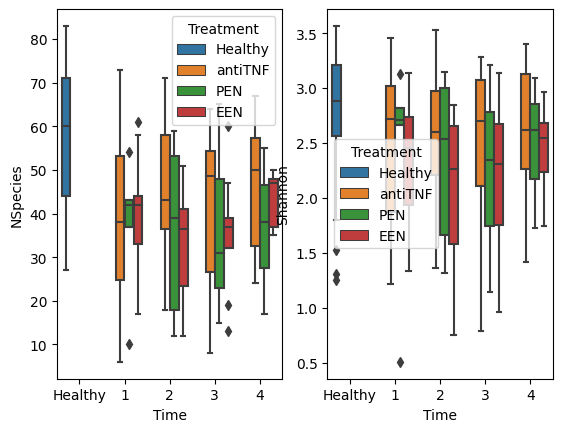

In [27]:
fig, axs = plt.subplots(1, 2)
sns.boxplot(x='Time', y='NSpecies', hue='Treatment', data=df, ax=axs[0])
sns.boxplot(x='Time', y='Shannon', hue='Treatment',data=df, ax=axs[1])


It can be recognized that in the anti-TNF treatment there is an increase in the average of the species with the continuation of the treatment, however, in the Shannon index it can be seen that there was no change (almost) at all.
In the rest of the treatments, the variety of oils remained within the average range of the first week (before the treatments began)

In [28]:
# Get the values for each time point and treatment
week1_species = df[df["Time"] == "1"]["NSpecies"].values
week2_species = df[df["Time"] == "2"]["NSpecies"].values
week3_species = df[df["Time"] == "3"]["NSpecies"].values
week4_species = df[df["Time"] == "4"]["NSpecies"].values

# Perform the Kruskal-Wallis test
result1_species = stats.kruskal(week1_species, week2_species, week3_species, week4_species, nan_policy='omit')

# Get the p-value from the test result
p_value1_species = result1_species[1]

print(f'NSpecies P-value of Kruskal Willis Test:{p_value1_species}')

# Get the values for each time point and treatment
week1_Shannon = df[df["Time"] == "1"]["Shannon"].values
week2_Shannon = df[df["Time"] == "2"]["Shannon"].values
week3_Shannon = df[df["Time"] == "3"]["Shannon"].values
week4_Shannon = df[df["Time"] == "4"]["Shannon"].values

# Perform the Kruskal-Wallis test
result1_Shannon = stats.kruskal(week1_Shannon, week2_Shannon, week3_Shannon, week4_Shannon, nan_policy='omit')

# Get the p-value from the test result
p_value1_Shannon = result1_Shannon[1]

print(f'Shannon Index P-value of Kruskal Willis Test:{p_value1_Shannon}')

NSpecies P-value of Kruskal Willis Test:0.5822590632289839
Shannon Index P-value of Kruskal Willis Test:0.865205435375232


There is no significant difference in the number of species between each week(1-4).

There is no significant difference in the Shannon Index between each week(1-4).

Research questions:
1. Is there a difference in effectiveness between the treatment methods?
2. How is the species diversity of the microbiome affected during treatments and does it reach a state of "healthy" microbiome?

Answers:

1.
According to the statistical analysis, 
And mainly according to the results of the second part, which analyzes the FCP values (Inflammatory Bowel Disease Index), there are differences between the effectiveness of the treatments, especially in the PEN treatment.
The most effective treatment is antiTNF.
It is followed (by a small margin) by EEN treatment.
And the least effective treatment is PEN.

2.
According to the statistical analysis and especially according to part 3 which analyzes the number of bacterial species and the Shannon index found in the samples, it can be said that during the EEN and PEN treatments, the number of species and the Shannon index remain around the average of week one (before the treatment).
Unlike them, it can be seen that suppressing the immune system (antiTNF treatment) slightly increases the average number of species and the Shannon index.
In addition, it can be said unequivocally that no treatment caused the patient data to be like the "healthy" data, since both in the number of species and in the Shannon index, the "healthy" data are higher than the patient data.